# A/B test

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


## perform A/B test on two different views of the explore course button to get the one with more interactions

* **remember** \begin{equation*} CTR(click-through-rate)=  \frac{ \# unique-visitors-to-click-on-button}{\# unique-visitors-of-home-page }  \end{equation*}


* #### Null hyposis and alternative hyposis

$$H_0: CTR_{experiment} - CTR_{control} <= 0$$
​
​
$$H_1: CTR_{experiment} - CTR_{control} > 0 0$$
​


In [20]:
#calculate CTR for control group
control_ctr=(df.query('group == "control" and action== "click"').id.nunique() 
             /df[df['group']=='control'].id.nunique() )
#calculate CTR for experiment group
experiment_ctr=(df.query('group == "experiment" and action== "click"').id.nunique() 
             /df[df['group']=='experiment'].id.nunique() )
#calculate difference in CTRs 
observed_diff=experiment_ctr - control_ctr
control_ctr,experiment_ctr,observed_diff


(0.2797118847539016, 0.3097463284379172, 0.030034443684015644)

0.010563100639013822

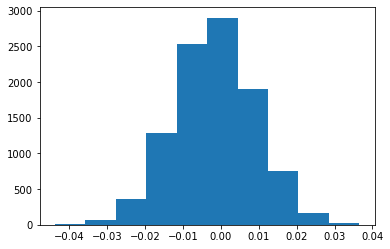

In [21]:
#bootstrap sampling
diffs=[]
for _ in range(10000):
    sample=df.sample(df.shape[0],replace=True)
    control_ctr=(sample.query('group == "control" and action== "click"').id.nunique() 
             /sample.query('group == "control" and action== "view"').id.nunique() )
    experiment_ctr=(sample.query('group == "experiment" and action== "click"').id.nunique() 
             /sample[sample['group']=='experiment'].id.nunique() )
    diffs.append(experiment_ctr - control_ctr)

#plot sample distribution
plt.hist(diffs)


diffs=np.array(diffs)
std=diffs.std()
std
    

0.002

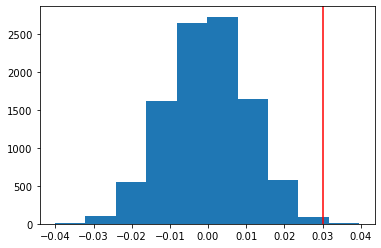

In [22]:
#simulate sample distribution from null hypothesis
null_vals=np.random.normal(0,std,diffs.size)
#plot sample distribution
plt.hist(null_vals)
plt.axvline(observed_diff,color='r')
#calculate p-value
pval=(null_vals > observed_diff).mean()
pval

#for alpha = 1% ---> pval <= alpha  ---> we can reject H0 

## Let's recap the steps we took to analyze the results of this A/B test.

#### 1-We computed the observed difference between the metric, click through rate, for the control and experiment group.
#### 2-We simulated the sampling distribution for the difference in proportions (or difference in click through rates).
#### 3-We used this sampling distribution to simulate the distribution under the null hypothesis, by creating a random normal distribution centered at 0 with the same spread and size.
#### 4-We computed the p-value by finding the proportion of values in the null distribution that were greater than our observed difference.
#### 5-We used this p-value to determine the statistical significance of our observed difference.

# TEST2
The second change Audacity is A/B testing is a more career focused description on a course overview page. They hope that this change may encourage more users to enroll and complete this course. In this experiment, we’re going to analyze the following metrics:

* Enrollment Rate: Click through rate for the Enroll button the course overview page    
* Average Reading Duration: Average number of seconds spent on the course overview page    
* Average Classroom Time: Average number of days spent in the classroom for students enrolled in the course    
* Completion Rate: Course completion rate for students enrolled in the course    

First, let's determine if the difference observed for each metric is statistically significant individually.

In [30]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


0.021

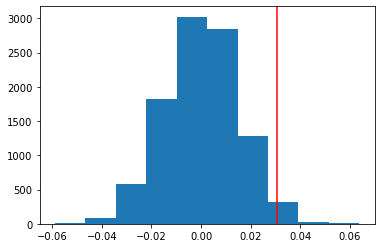

In [32]:
## enrollment_rate

# Get dataframe with all records from control group
control_df = df.query('group == "control"')
# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')
# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)
# Convert to numpy array
diffs = np.array(diffs)
# Plot sampling distribution
# plt.hist(diffs)

# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0,diffs.std(),diffs.size);
# Plot the null distribution
plt.hist(null_vals);
plt.axvline(obs_diff,color='r');

# Compute p-value
pval=(null_vals > obs_diff).mean()
pval


means 115.40710650582038 130.93220512539477 15.525098619574393


0.0

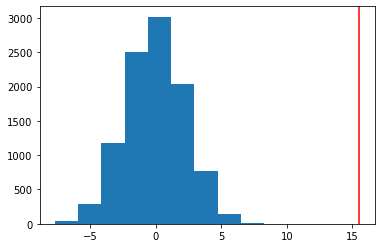

In [35]:
##  Average Reading Duration

np.random.seed(42)

# Compute control group mean duration
control_mean = df.query('group == "control"').duration.mean()
# Compute experiment group mean duration
experiment_mean = df.query('group == "experiment"').duration.mean()
# Compute the observed difference in click through rates
obs_diff = experiment_mean - control_mean
print ("means",control_mean,experiment_mean,obs_diff)

# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_mean = b_samp.query('group == "control"').duration.mean()
    experiment_mean = b_samp.query('group == "experiment"').duration.mean()
    diffs.append(experiment_mean - control_mean)
# Convert to numpy array
diffs = np.array(diffs)
# Plot sampling distribution
# plt.hist(diffs)

# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0,diffs.std(),diffs.size);
# Plot the null distribution
plt.hist(null_vals);
plt.axvline(obs_diff,color='r');

# Compute p-value
pval=(null_vals > obs_diff).mean()
pval

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


73.36899038461539

74.6715935334873

1.3026031488719099

0.0384

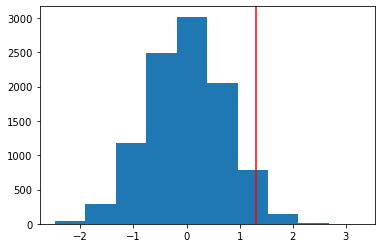

In [39]:
## Average Classroom Time
np.random.seed(42)
df = pd.read_csv('classroom_actions.csv')
display(df.head())

# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = df.query('group == "control"').total_days.mean()
# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"').total_days.mean()
# compute observed difference in classroom time
obs_diff = experiment_mean- control_mean
# display average classroom time for each group
display(control_mean, experiment_mean,obs_diff)


# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for _ in range(10000):
    sam=df.sample(df.shape[0],replace=True)
    control_mean = sam.query('group == "control"').total_days.mean()
    experiment_mean = sam.query('group == "experiment"').total_days.mean()
    diffs.append(experiment_mean-control_mean)
# convert to numpy array
diffs=np.array(diffs)
# plot sampling distribution
# plt.hist(diffs)

# simulate distribution under the null hypothesis
null_vals =np.random.normal(0,diffs.std(),diffs.size)
# plot null distribution
plt.hist(null_vals);
# plot line for observed statistic
plt.axvline(obs_diff,color='r');

# compute p value
pval=(null_vals > obs_diff).mean()
pval

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


0.3719951923076923

0.3935334872979215

0.02153829499022919

0.0846

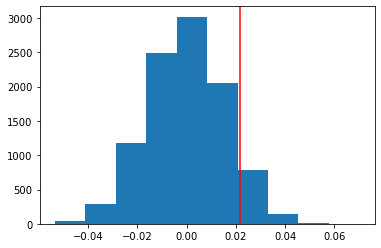

In [62]:
## completion_rate
np.random.seed(42)
df = pd.read_csv('classroom_actions.csv')
display(df.head())

# get the average completion for control group
control_mean = (df.query('group == "control"').completed).mean()
# get the average completion for experiment group
experiment_mean = (df.query('group == "experiment"').completed).mean()
# compute observed difference in completion
obs_diff = experiment_mean- control_mean
# display average classroom time for each group
display(control_mean, experiment_mean,obs_diff)

# create sampling distribution of difference in average classroom times
# with boostrapping
diffs=[]
for _ in range(10000):
    sam=df.sample(df.shape[0],replace=True)
    control_mean = (sam.query('group == "control"').completed).mean()
    experiment_mean = (sam.query('group == "experiment"').completed).mean()
    diffs.append(experiment_mean- control_mean)
# convert to numpy array
diffs=np.array(diffs)
# plot sampling distribution
# plt.hist(diffs);


# simulate distribution under the null hypothesis
null_vals =np.random.normal(0,diffs.std(),diffs.size)
# plot null distribution
plt.hist(null_vals);
# plot line for observed statistic
plt.axvline(obs_diff,color='r');

# compute p value
pval=(null_vals > obs_diff).mean()
pval